# Import Libraries

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# opsi pada pandas untuk melihat kolom data secara keseluruhan
pd.options.display.max_columns = None

In [3]:
# code untuk menghilangkan warning
from warnings import filterwarnings
filterwarnings('ignore')

# Data Loading

In [4]:
# load dataset
df = pd.read_csv('df_travel_V2.csv')

In [5]:
# preview 5 baris data pertama
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,Taken,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,Not_taken,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,Taken,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,Not_taken,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,Not_taken,33.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
# preview 5 baris data terakhir
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,Taken,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,Taken,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,Taken,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,Taken,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,Taken,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [7]:
# dimensi dataset
df.shape

(4888, 20)

Dataset ini memiliki 4.888 baris data dan 20 kolom data.

In [8]:
# nama-nama kolom dataset
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [9]:
# informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   object 
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

Dataset ini tidak memilik missing values.

## Convert Rupee India ke Rupiah Indonesia

1 Rupee India = 189,68 Rupiah Indonesia (data diambil pada 3 Juli 2022)

In [10]:
df['MonthlyIncome_rp'] = df['MonthlyIncome'] * 189.68

In [11]:
print('Minimum pendapatan perbulan customer :', np.round(df['MonthlyIncome_rp'].min()))
print('Maksimum pendapatan perbulan customer :', np.round(df['MonthlyIncome_rp'].max()))
print('Rata-rata pendapatan perbulan customer :', np.round(df['MonthlyIncome_rp'].mean()))

Minimum pendapatan perbulan customer : 81942.0
Maksimum pendapatan perbulan customer : 19093568.0
Rata-rata pendapatan perbulan customer : 4514518.0


# Exploratory Data Analysis (EDA)

## Distribusi Data Numerik

In [12]:
# membuat fungsi untuk distribusi data menggunakan histogram dan boxplot
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print('Skewness :', df[col].skew())
    if -0.5 <= df[col].skew() <= 0.5:
        print("Kolom '{}' berdistribusi normal".format(col))
    elif df[col].skew() > 0.5:
        print("Kolom '{}' right skewed (miring ke kanan)".format(col))
    elif df[col].skew() < -0.5:
        print("Kolom '{}' left skewed (miring ke kiri)".format(col))

Age, DurationOfPitch, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome_rp

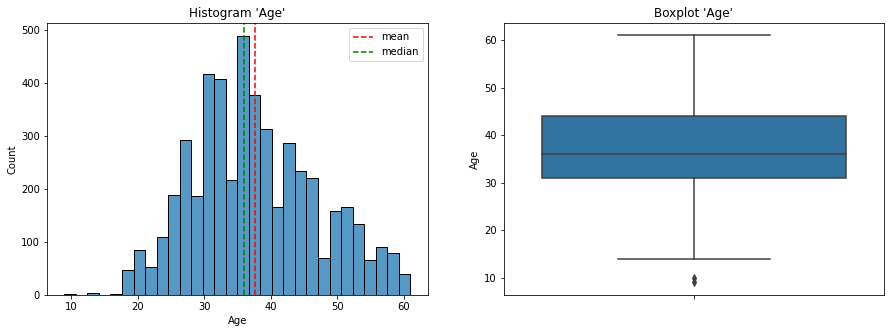

Skewness : 0.3543709485206543
Kolom 'Age' berdistribusi normal


In [13]:
# fungsi visualisasi distribusi data pada kolom `Age`
plot_dist(df, 'Age')

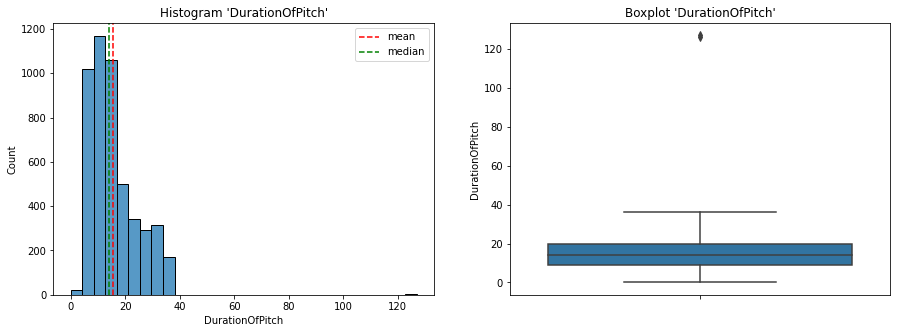

Skewness : 1.682101388381907
Kolom 'DurationOfPitch' right skewed (miring ke kanan)


In [14]:
# fungsi visualisasi distribusi data pada kolom `DurationOfPitch`
plot_dist(df, 'DurationOfPitch')

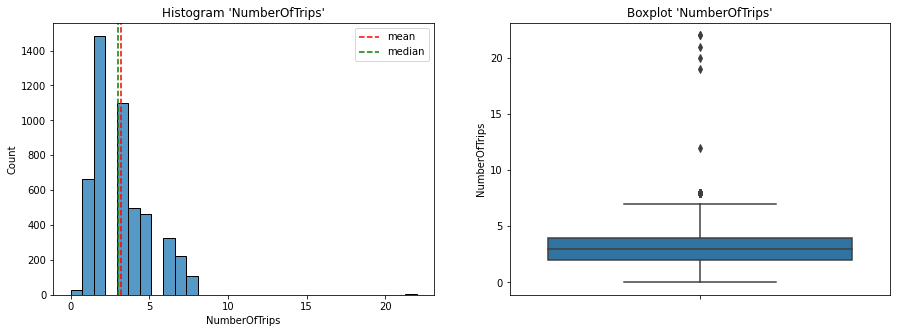

Skewness : 1.5814264500865294
Kolom 'NumberOfTrips' right skewed (miring ke kanan)


In [15]:
# fungsi visualisasi distribusi data pada kolom `NumberOfTrips`
plot_dist(df, 'NumberOfTrips')

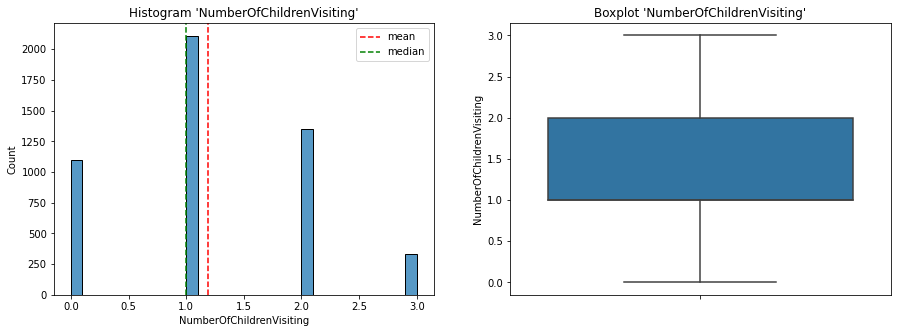

Skewness : 0.2726616722178266
Kolom 'NumberOfChildrenVisiting' berdistribusi normal


In [16]:
# fungsi visualisasi distribusi data pada kolom `NumberOfChildrenVisiting`
plot_dist(df, 'NumberOfChildrenVisiting')

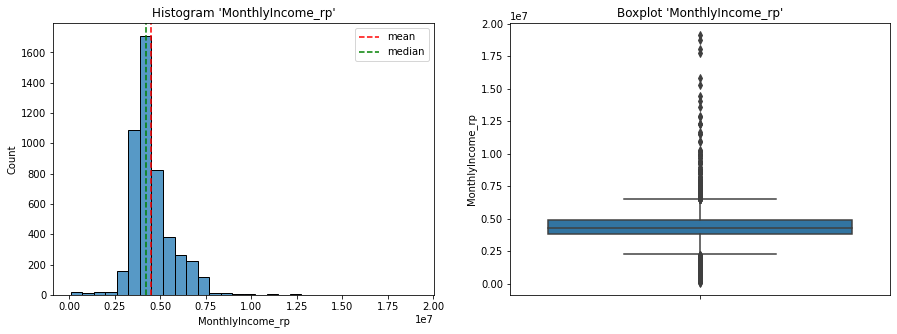

Skewness : 2.5039954707693357
Kolom 'MonthlyIncome_rp' right skewed (miring ke kanan)


In [17]:
# fungsi visualisasi distribusi data pada kolom `MonthlyIncome_rp`
plot_dist(df, 'MonthlyIncome_rp')

## Proporsi Jenis Paket Holiday

In [18]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,MonthlyIncome_rp
0,200000,Taken,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3981952.24
1,200001,Not_taken,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,3818258.40
2,200002,Taken,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3241631.20
3,200003,Not_taken,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3396979.12
4,200004,Not_taken,33.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,3503010.24


In [19]:
pie_data = df['ProductPitched'].value_counts()
pie_data

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

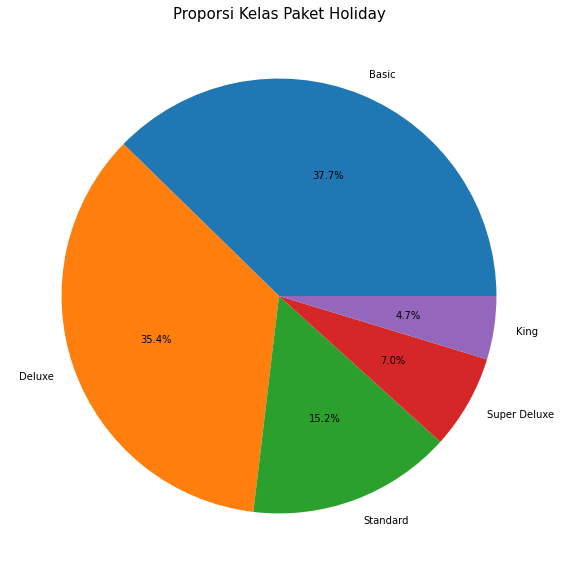

In [20]:
pie_data.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporsi Kelas Paket Holiday", size = 15)
plt.ylabel("")
plt.show()

## Rata-rata gaji perbulan dengan tipe jabatannya

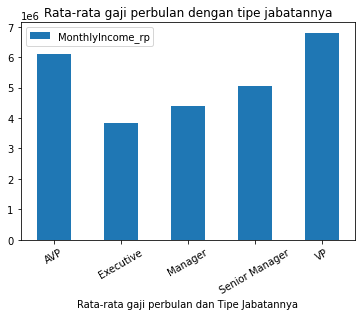

In [21]:
gaji = df[["MonthlyIncome_rp"]].groupby(df["Designation"]).mean().plot(kind='bar')
plt.xticks(rotation=30)
plt.xlabel("Rata-rata gaji perbulan dan Tipe Jabatannya")
gaji.set_title("Rata-rata gaji perbulan dengan tipe jabatannya")
plt.show()

## Product Holiday Package yang diambil berdasarkan jabatan pekerjaan user

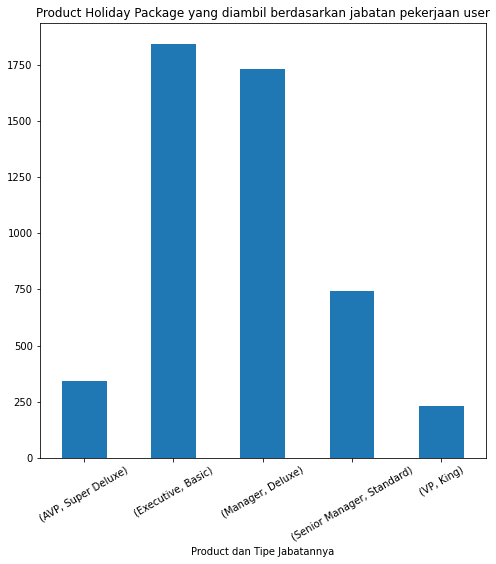

In [22]:
plt.figure(figsize=(8, 8))
product = df[["ProductPitched"]].groupby(df["Designation"]).value_counts().plot(kind='bar')
plt.xticks(rotation=30)
plt.xlabel("Product dan Tipe Jabatannya")
product.set_title("Product Holiday Package yang diambil berdasarkan jabatan pekerjaan user")
plt.show()

## Coba

Coba pull request